In [2]:
# do not change code here
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
pd.set_option('chained_assignment',None)
import stemgraphic

In [3]:

def load_dataset(filename):
    """
      Input: filename - name of the file to load
             the colnames are - A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
             Note that the csv file doesn't contain column names, so read it appropriately.
      Output: return a pandas dataframe containing the dataset
      """
    # YOUR CODE HERE
    #raise NotImplementedError()
    crdata=pd.read_csv(filename, header=None)
    crdata.columns=['Year', 'Month', 'Day', 'Hour', 'GHI', 'Wind Speed']
    return crdata

In [4]:
df= load_dataset('Year_2000.csv')

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df
result = seasonal_decompose(series, model='additive',freq=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

        Year  Month   Day  Hour  GHI  Wind Speed
0     2000.0    1.0   1.0   0.0  0.0    3.736798
1     2000.0    1.0   1.0   1.0  0.0    3.702789
2     2000.0    1.0   1.0   2.0  0.0    3.614095
3     2000.0    1.0   1.0   3.0  0.0    3.487340
4     2000.0    1.0   1.0   4.0  0.0    3.319650
...      ...    ...   ...   ...  ...         ...
8755  2000.0   12.0  31.0  19.0  0.0    3.338511
8756  2000.0   12.0  31.0  20.0  0.0    3.630050
8757  2000.0   12.0  31.0  21.0  0.0    3.752012
8758  2000.0   12.0  31.0  22.0  0.0    3.776443
8759  2000.0   12.0  31.0  23.0  0.0    3.766600

[8760 rows x 6 columns]
      Year  Month  Day  Hour  GHI  Wind Speed
0      0.0    0.0  0.0   0.0  0.0         0.0
1      0.0    0.0  0.0   0.0  0.0         0.0
2      0.0    0.0  0.0   0.0  0.0         0.0
3      0.0    0.0  0.0   0.0  0.0         0.0
4      0.0    0.0  0.0   0.0  0.0         0.0
...    ...    ...  ...   ...  ...         ...
8755   0.0    0.0  0.0   0.0  0.0         0.0
8756   0.0    0.0  

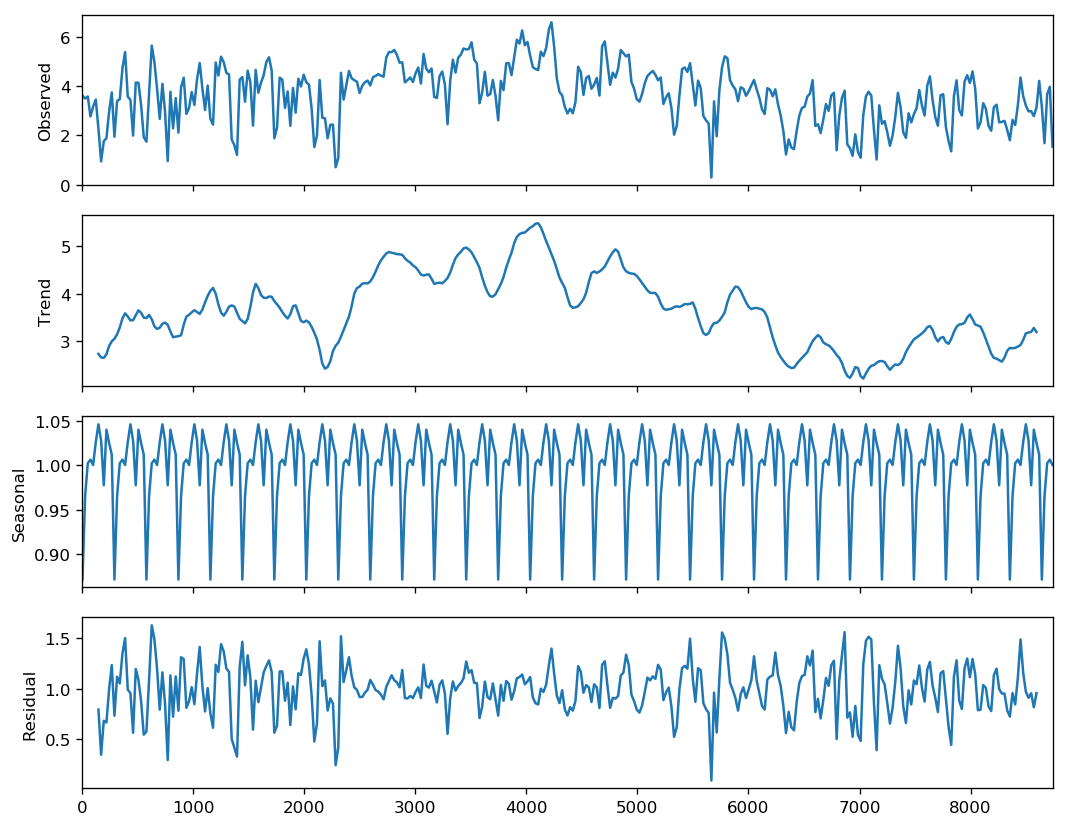

In [34]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
pyplot.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
#df= load_dataset('alldata.csv')
df= load_dataset('Year_2000.csv')
series = df[df["Hour"]==2]['Wind Speed']
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()
pyplot.show()

In [7]:
result.seasonal[:20]

12     0.845894
36     0.906418
60     0.977872
84     1.094033
108    0.974902
132    0.853727
156    1.052101
180    1.014739
204    1.001416
228    1.112081
252    1.176657
276    0.990161
300    0.845894
324    0.906418
348    0.977872
372    1.094033
396    0.974902
420    0.853727
444    1.052101
468    1.014739
Name: Wind Speed, dtype: float64

In [8]:
..
..df.astype('int32')

SyntaxError: invalid syntax (<ipython-input-8-56cacf85c8a7>, line 1)

In [ ]:
df_filtered = df[(df['GHI']) >0] 
dfd=df_filtered[(df_filtered['Day'])<2]  
dfd=dfd[(dfd['Month'])<2 ]
dfd.head(32)

In [ ]:
dff=df_filtered

In [ ]:
dff['Wind Speed']

In [ ]:
plt.hist(dff['Wind Speed'])

(array([ 271.,  857., 1268., 1578., 1582., 1453.,  993.,  494.,  212.,
          52.]),
 array([0.0252213 , 0.77525511, 1.52528892, 2.27532274, 3.02535655,
        3.77539036, 4.52542417, 5.27545799, 6.0254918 , 6.77552561,
        7.52555942]),
 <a list of 10 Patch objects>)

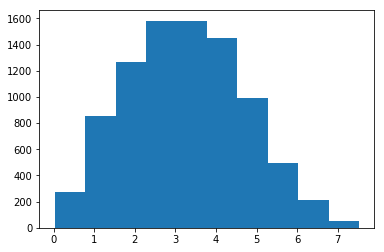

In [7]:
plt.hist(df['Wind Speed'])

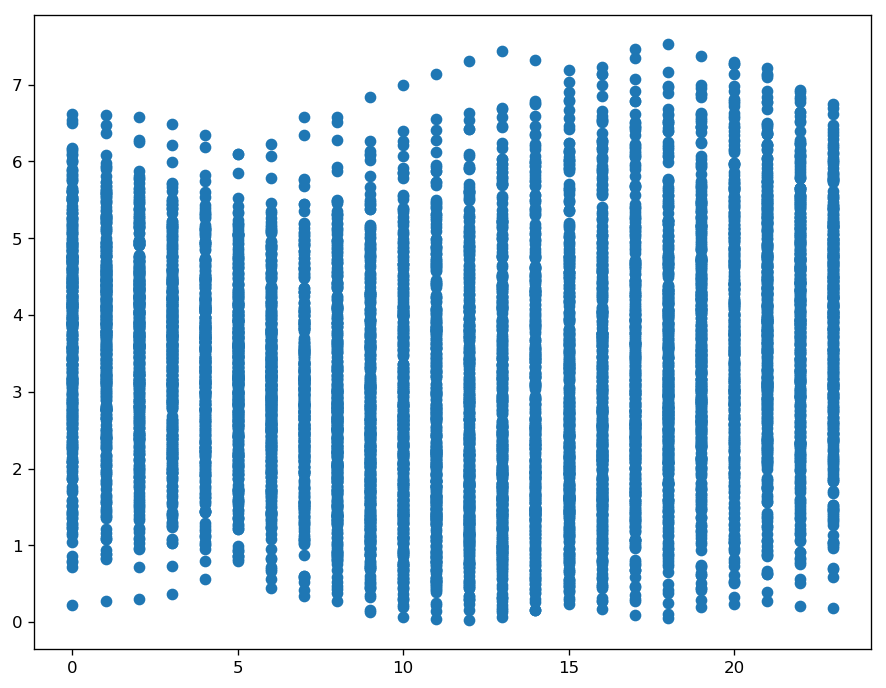

In [9]:
plt.scatter(df['Hour'],df['Wind Speed'])

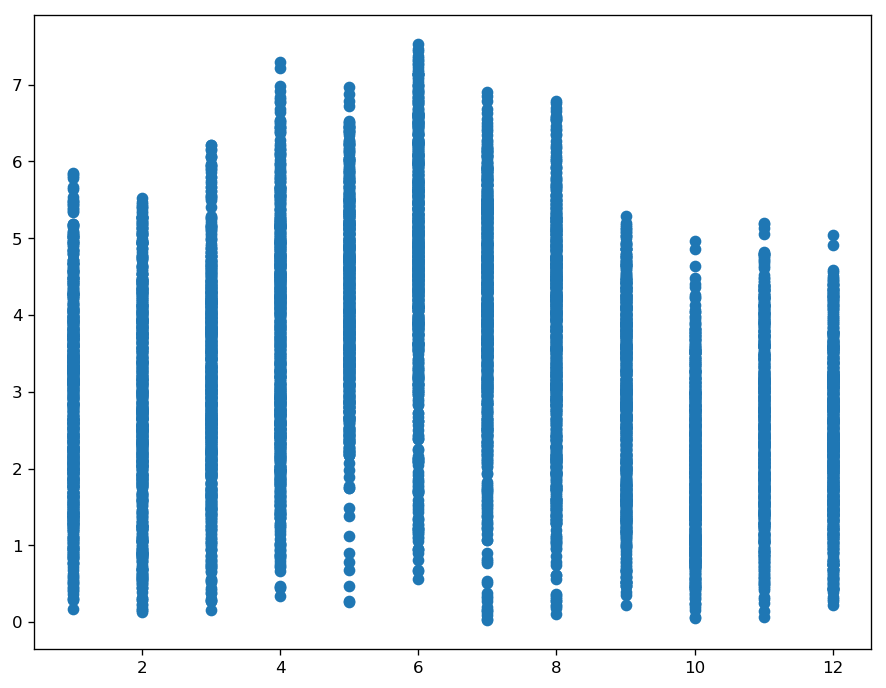

In [10]:
plt.scatter(df['Month'],df['Wind Speed'])

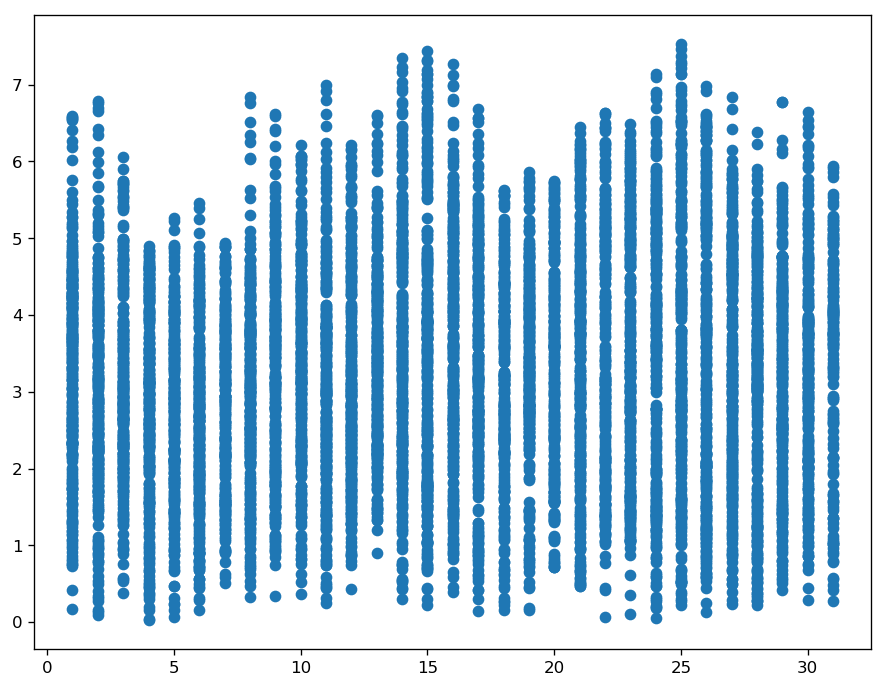

In [11]:
plt.scatter(df['Day'],df['Wind Speed'])

In [ ]:
plt.scatter(dfd['Hour'],dfd['Wind Speed'])

In [ ]:
plt.scatter(df['Hour'],df['Wind Speed'])

NameError: name 'dff' is not defined

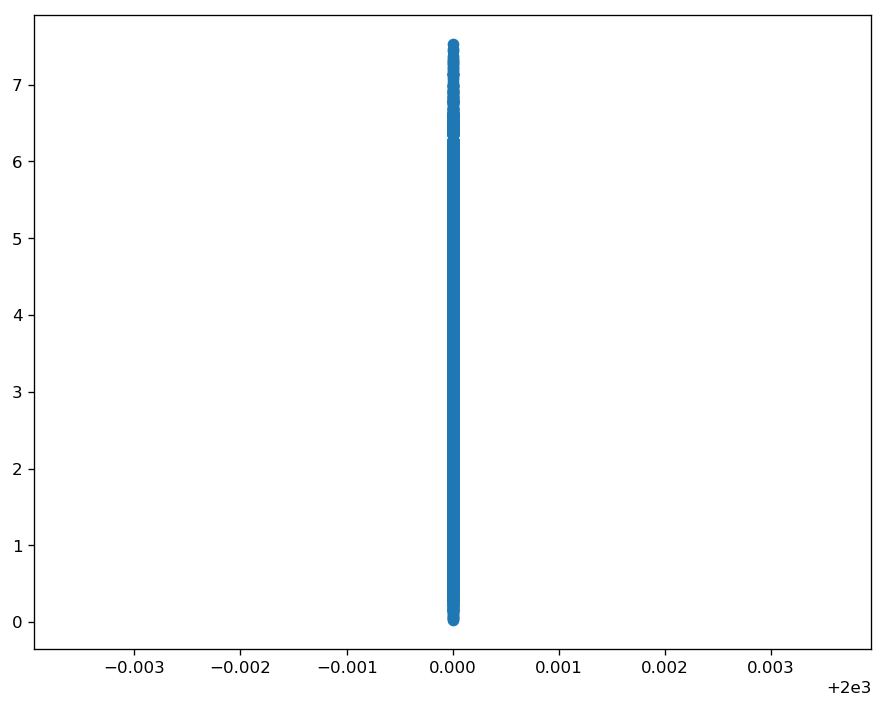

In [14]:
plt.scatter(df['Year'],df['Wind Speed'])
df=dff

In [13]:
sp.stats.kstest(df['Wind Speed'], 'norm')

KstestResult(statistic=0.8159744543542486, pvalue=0.0)

In [ ]:
dff['Wind Speed'].dtype

In [15]:
sp.stats.kstest(df['Wind Speed'], 'expon')

KstestResult(statistic=0.6577952886638317, pvalue=0.0)

In [ ]:
sp.stats.normaltest(dff['Wind Speed'])

Wind Speed    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

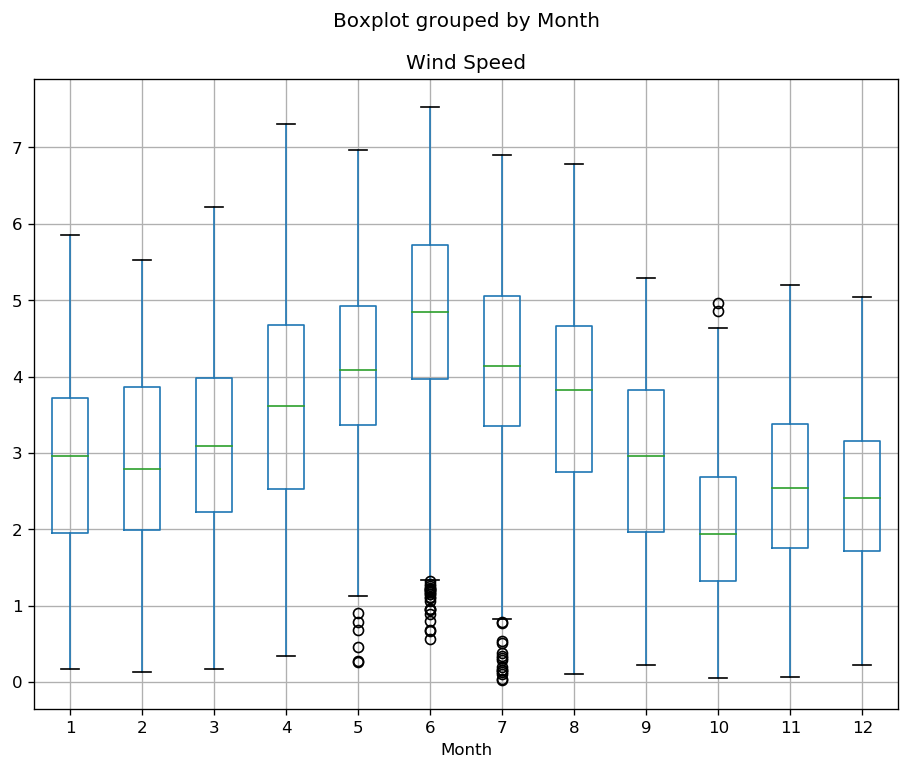

In [17]:
df.boxplot(column=['Wind Speed'],by='Month',return_type='axes')

In [18]:
df.groupby(['Year']).corr()

Month           Day          Hour       GHI  \
Year                                                                  
2000 Month       1.000000e+00  1.189318e-02  2.378988e-19 -0.049067   
     Day         1.189318e-02  1.000000e+00  4.848940e-18  0.008722   
     Hour        2.378988e-19  4.848940e-18  1.000000e+00  0.079493   
     GHI        -4.906720e-02  8.722133e-03  7.949347e-02  1.000000   
     Wind Speed -1.790932e-01  8.990548e-02  4.859148e-02 -0.207963   

                 Wind Speed  
Year                         
2000 Month        -0.179093  
     Day           0.089905  
     Hour          0.048591  
     GHI          -0.207963  
     Wind Speed    1.000000

In [ ]:
df.diff().corr()

In [ ]:
df.corr()

In [19]:
sp.stats.kurtosis(df['Wind Speed'])

-0.5369090443349078

In [20]:
sp.stats.kurtosistest(df['Wind Speed'])

KurtosistestResult(statistic=-14.281994082696357, pvalue=2.833752987828324e-46)

In [21]:
sp.stats.dweibull(df['Wind Speed'])

In [22]:
sp.stats.skew(df['Wind Speed'])

0.1684404093695421

In [23]:
sp.stats.skewtest(df['Wind Speed'])

SkewtestResult(statistic=6.396873781005418, pvalue=1.5859031354419567e-10)

(<Figure size 900x330 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x2b06e1c8550>)

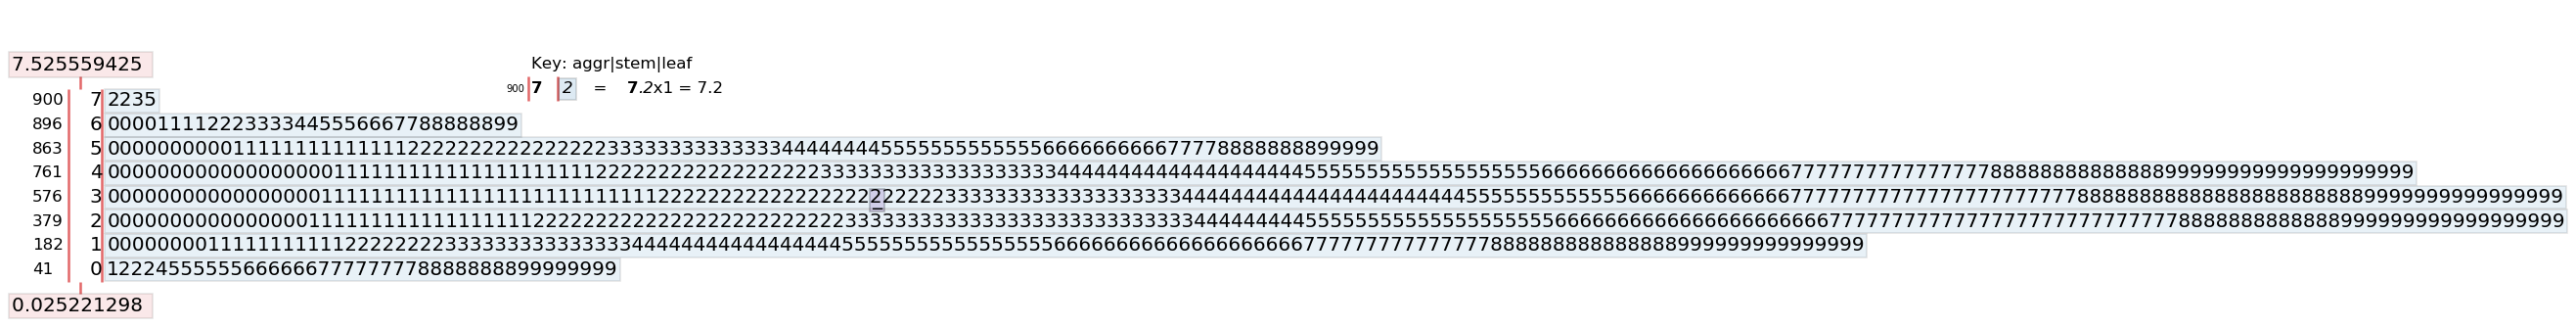

In [24]:
stemgraphic.stem_graphic(df['Wind Speed'], scale = 1)

In [25]:
(df['Month']).dtype

dtype('int64')

In [26]:
sp.stats.norm.fit(df['Wind Speed'])

(3.2509944273014844, 1.4380892627175423)

ValueError: x and y must have same first dimension, but have shapes (10,) and (8760,)

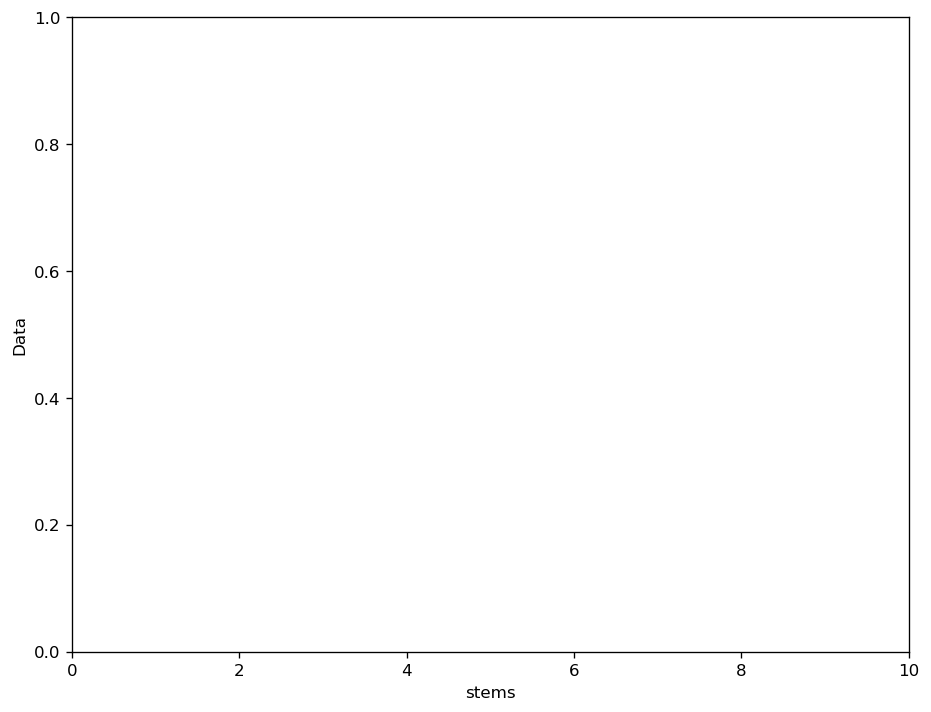

In [27]:
import matplotlib.pyplot as plt 
  
data = df['Wind Speed'] 
  
# separating the stem parts 
stems = [1, 1, 2, 2, 2, 4, 4, 4, 5, 5] 
  
plt.ylabel('Data')   # for label at y-axis 
  
plt.xlabel('stems')   # for label at x-axis 
  
plt.xlim(0, 10)   # limit of the values at x axis 
  
plt.stem(stems, data)   # required plot 

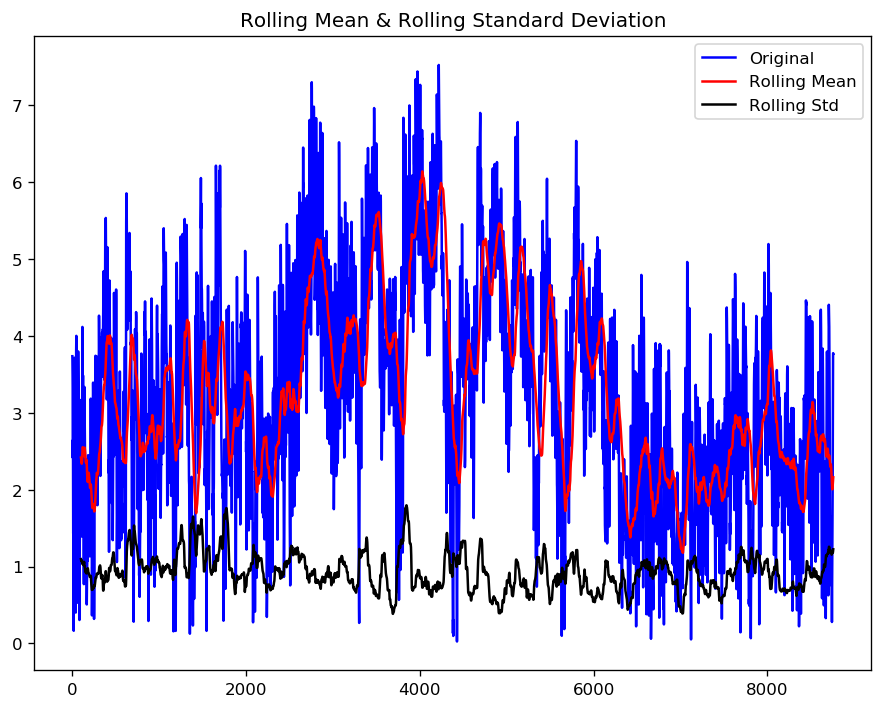

In [28]:
rolling_mean = df['Wind Speed'].rolling(window = 100).mean()
rolling_std = df['Wind Speed'].rolling(window = 100).std()
plt.plot(df['Wind Speed'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
ARIMA(df, order=(1, 1, 1))

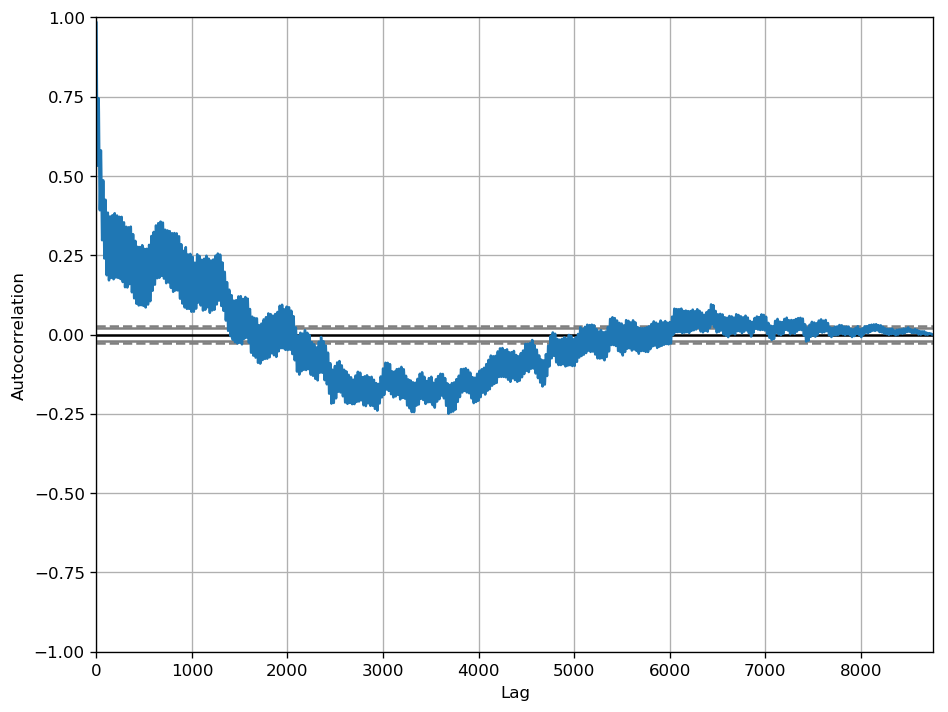

In [29]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(data)
pyplot.show()

In [30]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

8760    3.696279
dtype: float64


In [31]:
data = df['Wind Speed'] 

In [ ]:
data

In [32]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

8760    3.58122
dtype: float64


In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [6]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = df['Wind Speed']
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

8760    3.755929
dtype: float64


In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [49]:
test_stationarity(df)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [8]:
from statsmodels.tsa.stattools import adfuller

results=adfuller(data)

In [9]:
results

(-6.479946390654602,
 1.3025584483729644e-08,
 37,
 8722,
 {'1%': -3.431099968539641,
  '5%': -2.86187143613454,
  '10%': -2.5669464184887825},
 -8461.724541175441)